### Gradient Boosting
1. To Understand Stepwise Working of Gradient Boosting for Regression <u><a href='https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/'>Click Here!</a></u>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [3]:
df = pd.DataFrame()

df['X'] = X.reshape(100)
df['y'] = y
df.shape

(100, 2)

In [4]:
df.sample(10)

,X,y
76,0.271270,0.186762
83,-0.436442,0.604272
80,0.363103,0.488821
98,-0.474581,0.689516
2,0.231994,0.166052
77,-0.425955,0.555927
71,-0.301284,0.206294
84,-0.189018,0.058449
89,-0.027785,0.022955
50,0.469585,0.612002


Text(0.5, 1.0, 'X vs Y')

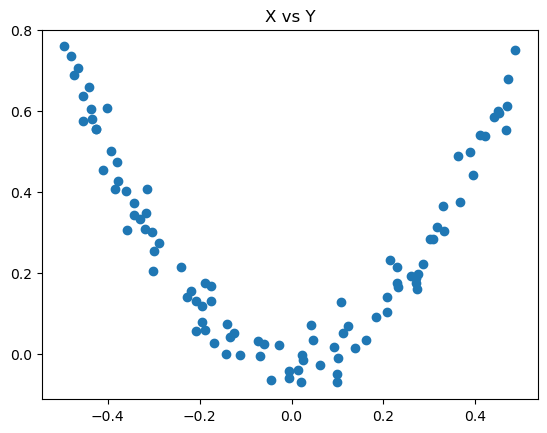

In [5]:
# Non Linear Convex Data

plt.scatter(df['X'],df['y'])
plt.title('X vs Y')

#### First Model always predicts mean of the target column

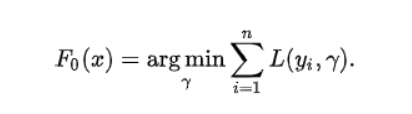

* Here L is our loss function
* Gamma is our predicted value
* argmin means we have to find a predicted value/gamma for which the loss function

In [6]:
df['pred1'] = df['y'].mean()
df

,X,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


#### Calculating Residulas for M1

In [7]:
df['res1'] = df['y'] - df['pred1']
df

,X,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528
...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133
96,0.022733,-0.002305,0.265458,-0.267763
97,-0.072459,0.032809,0.265458,-0.232650
98,-0.474581,0.689516,0.265458,0.424057


#### Plot first Model

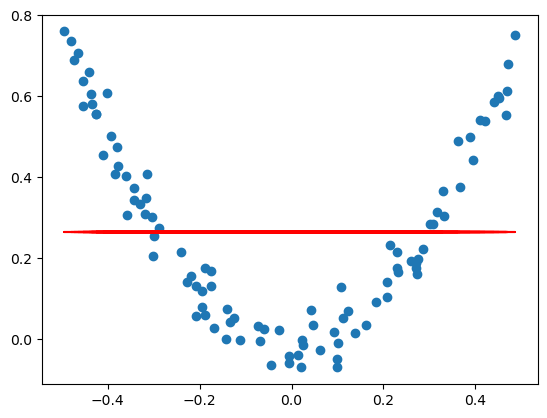

In [8]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'], df['pred1'], color='red')

#### Training 2nd Model i.e. M2 ON Input column and Target column(as residuals of M1 i.e. res1)

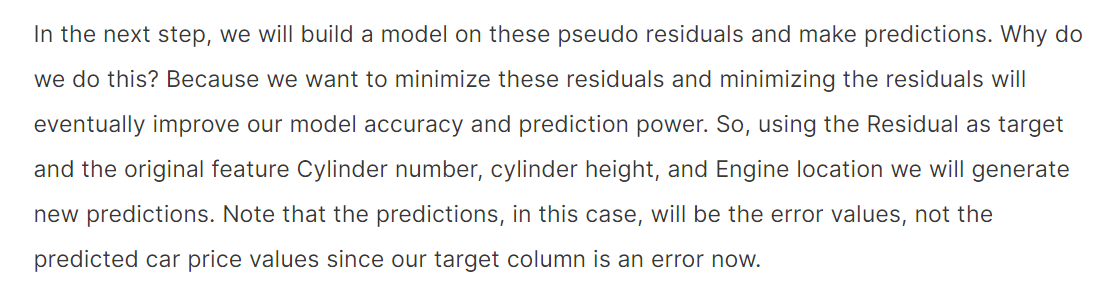

In [9]:
from sklearn.tree import DecisionTreeRegressor
m2 = DecisionTreeRegressor(max_leaf_nodes=8)

m2.fit(df['X'].values.reshape(100,1), df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

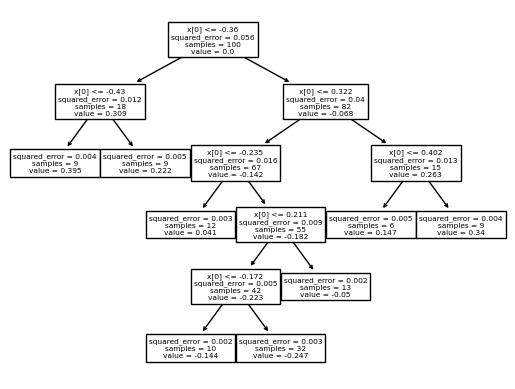

In [10]:
from sklearn.tree import plot_tree
plot_tree(m2)
plt.show()

In [11]:
# generating test data
X_test = np.linspace(-0.5, 0.5, 500)

#### Making Prediction as 
** M1(mean) + prediction of M2 **

In [12]:
y_pred = 0.265458 + m2.predict(X_test.reshape(500, 1))

#### Plot M2's Predictions

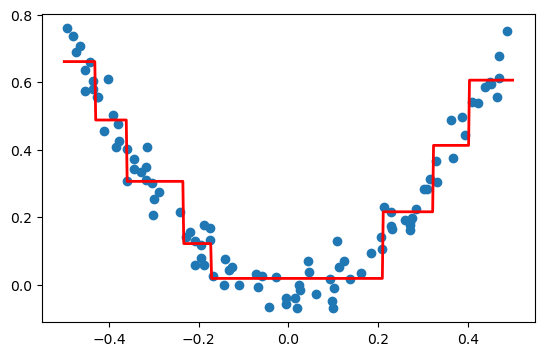

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2, color='red')
plt.scatter(df['X'], df['y'])

#### Save Predictions of M2

In [14]:
df['pred2'] = 0.265458 + m2.predict(df['X'].values.reshape(100,1))
df

,X,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


#### Residuals of M2

In [15]:
df['res2'] = df['y'] - df['pred2']
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


#### Training Next Model M3 
With Input column and Traget column (as Residuals of M2 i.e. res2)

In [16]:
m3 = DecisionTreeRegressor(max_leaf_nodes=8)
m3.fit(df['X'].values.reshape(100,1), df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

#### Make Predction
Making Prediction by using
M1(mean) + prediction of M2 + prediction of M3 (Learning Rate is 1)

In [17]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1, 1)) for regressor in [m2,m3])

#### Plot Predictions after M3
Notice Changes in the plots of M2 and M3

Text(0.5, 1.0, 'X vs y')

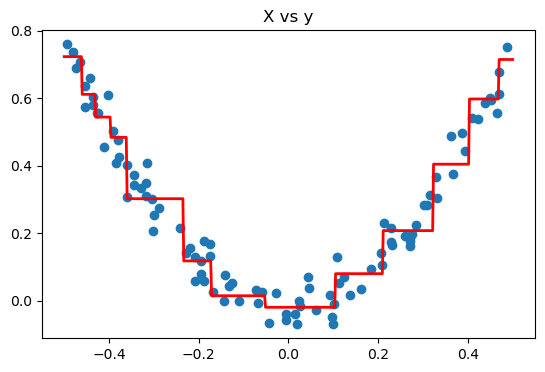

In [18]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

this code implements gradient boosting using decision trees as weak learners. At each iteration, it fits a decision tree to the residuals of the previous iteration and adds it to the ensemble. The process continues for ''number'' iterations, with each subsequent model trying to correct the errors of the previous ones.

gradient_boost takes Parameters as
* X: Input features.
* y: Target variable.
* number: Number of boosting iterations.
* lr: Learning rate, here it is 1.
* count: Counter for the current boosting iteration (defaults to 1).
* regs: List to store the regression models (in this case, DecisionTreeRegressor).
* orig_target: A variable that holds the target variable y for the first iteration.

In [19]:
def gradient_boost(X, y, number, lr, count=1, regs=[], orig_target=None):
    # checks if number is zero. If so, it exits
    if number == 0:
        return 
    else:
        # Do Gradient Boosting
        # If count is greater than 1 i.e. first model is done, 
        # calculates rsiduals i.e. it subtracts the predictions of the last regression model from y.
        if count > 1:
          y = y - regs[-1].predict(X)
        else:
          orig_target = y
            
        tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
        tree_reg.fit(X, y)

        # appending the models
        regs.append(tree_reg)
    
        x1 = np.linspace(-0.5, 0.5, 500)
        # in reshape(-1,1), -1 indicates take all rows in original array, we can pass 500 as well 
        # Sum of predictions of all models as final prediction
        y_pred = sum(lr * regressor.predict(x1.reshape(-1, 1)) for regressor in regs)
    
        print(number)
        plt.figure()
        plt.plot(x1, y_pred, linewidth=2)
        plt.plot(X[:, 0], orig_target, "r.")
        plt.show()
    
        gradient_boost(X, y, number-1, lr, count+1, regs, orig_target=orig_target)


5


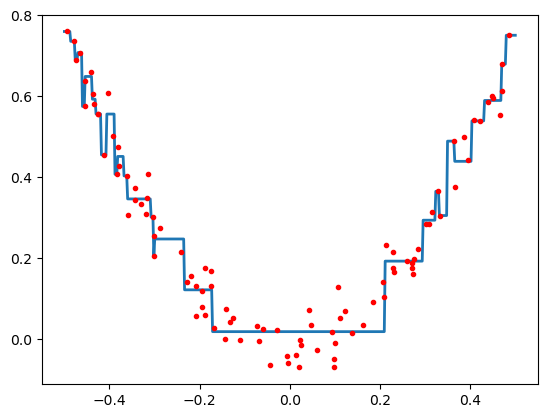

4


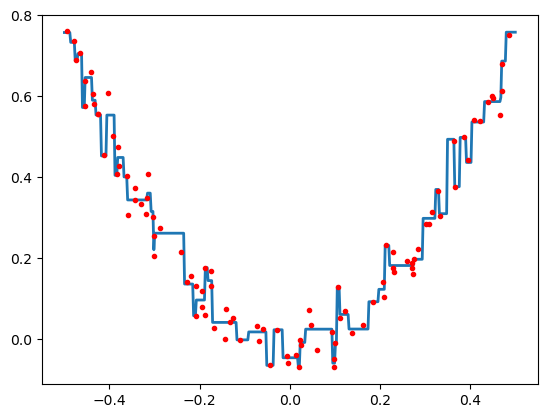

3


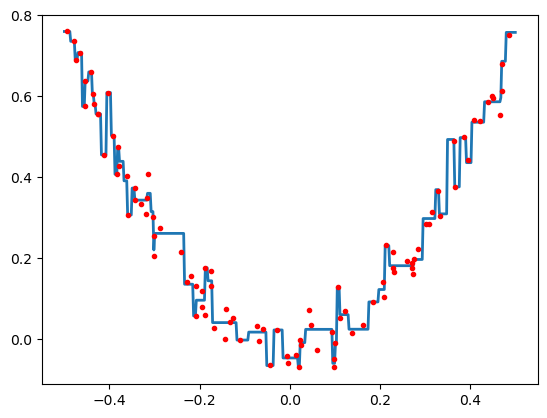

2


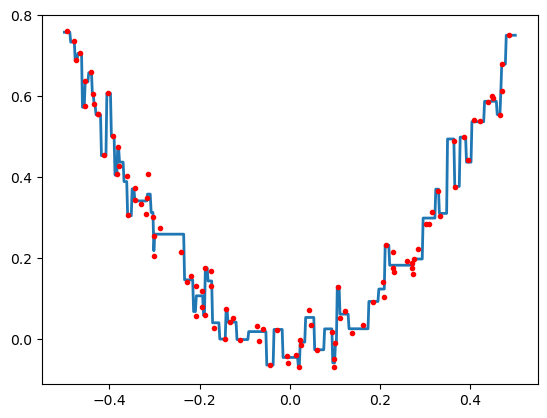

1


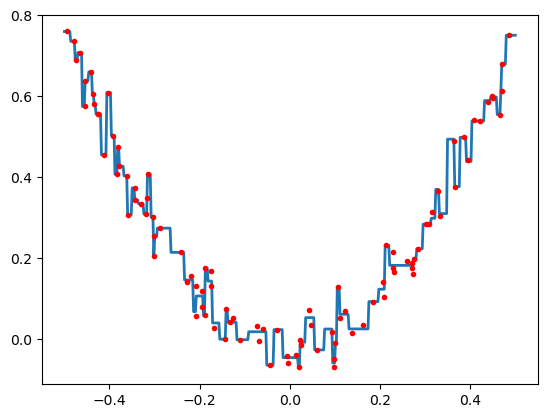

In [20]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X, y, number=5, lr=1)

#### AdaBoost Vs. Gradient Boost

1. max_leaf_nodes
   <br>in AdaBoost we use Decision Stumps, where max_depth is always 1 or max_leaf_nodes are 2.
   <br>But in Gradient Boost max_leaf_nodes can be anywhere from 8-32 for optimal performance

2. learning_rate
   <br> in AdaBoost we use alpha to explain the influence of a particuualr model.
   <br>But in Gradient Boost same learning rate is factored in all model onwards after the Initial Model (M1)